<a href="https://colab.research.google.com/github/CPMOliveira/cpmoliveira.github.io/blob/master/ciencia_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# Conhecendo o Dataset

In [55]:
df = pd.read_csv('train.csv', index_col='id')

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
id,,,,,,,,,,,,,,,,,,,,,
0,52,technician,divorced,professional.course,NaN,yes,no,telephone,jun,mon,56,8,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,no
1,36,management,married,university.degree,no,yes,no,cellular,nov,tue,267,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
2,53,blue-collar,married,high.school,no,yes,yes,cellular,jul,mon,243,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
3,45,blue-collar,single,basic.9y,no,yes,no,cellular,aug,wed,249,1,4,1,success,-2.9,92.201,-31.4,0.879,5076.2,no
4,60,housemaid,married,high.school,NaN,yes,no,telephone,may,wed,74,1,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37069 entries, 0 to 37068
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37069 non-null  int64  
 1   job             36773 non-null  object 
 2   marital         37000 non-null  object 
 3   education       35505 non-null  object 
 4   default         29296 non-null  object 
 5   housing         36176 non-null  object 
 6   loan            36176 non-null  object 
 7   contact         37069 non-null  object 
 8   month           37069 non-null  object 
 9   day_of_week     37069 non-null  object 
 10  duration        37069 non-null  int64  
 11  campaign        37069 non-null  int64  
 12  pdays           37069 non-null  int64  
 13  previous        37069 non-null  int64  
 14  poutcome        37069 non-null  object 
 15  emp.var.rate    37069 non-null  float64
 16  cons.price.idx  37069 non-null  float64
 17  cons.conf.idx   37069 non-null 

In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000
mean,40.023497,258.185492,2.566862,962.058189,0.173946,0.082222,93.576416,-40.505555,3.620484,5166.966047
std,10.412653,259.579105,2.765626,187.939691,0.497441,1.571009,0.578585,4.623600,1.735310,72.360902
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


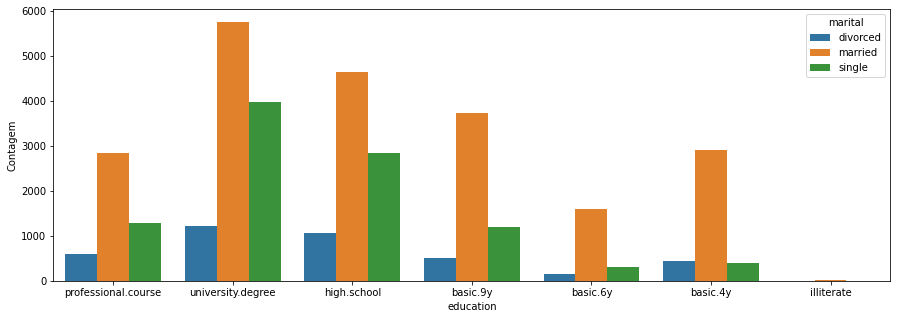

In [12]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='education', hue='marital')
plt.ylabel('Contagem')
plt.show()

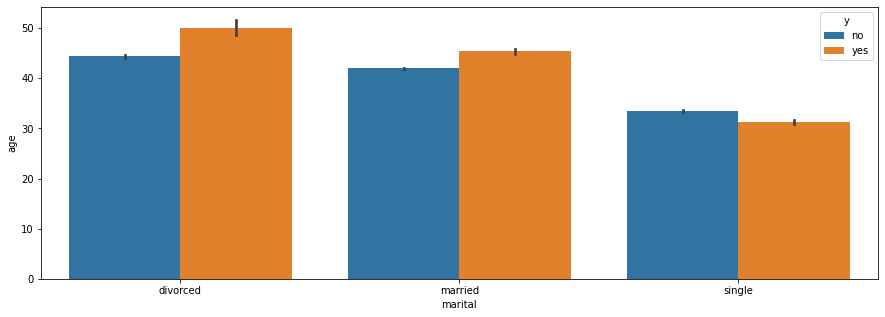

In [17]:
plt.figure(figsize=(15,5))
sns.barplot(data=df, x='marital', y='age', hue='y')
plt.show()

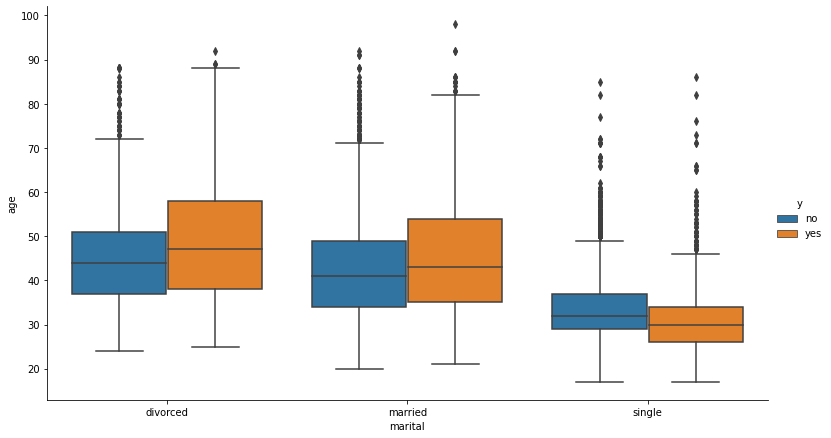

In [26]:
sns.catplot(data=df, x='marital', y='age', hue='y', kind='box', aspect=16/9, height=6)

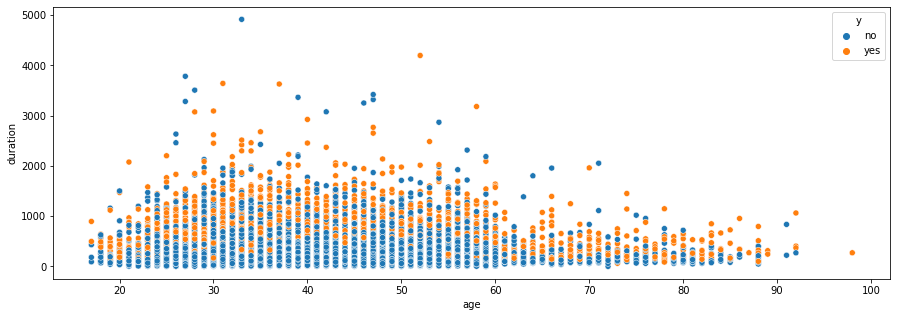

In [27]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='age', y='duration', data=df, hue='y')
plt.show()

In [30]:
df[df.y == 'yes'].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000
mean,40.902299,551.579502,2.055316,790.203305,0.494732,-1.220690,93.361787,-39.819397,2.131688,5095.297031
std,13.831597,400.507671,1.667744,404.722734,0.863898,1.621333,0.675989,6.101435,1.745427,87.923517
min,17.000000,63.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,252.750000,1.000000,999.000000,0.000000,-1.800000,92.893000,-46.200000,0.853250,5017.500000
50%,37.000000,449.000000,2.000000,999.000000,0.000000,-1.800000,93.200000,-40.400000,1.266000,5099.100000
75%,50.000000,741.250000,2.000000,999.000000,1.000000,-0.100000,93.918000,-36.100000,4.503500,5191.000000
max,98.000000,4199.000000,23.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Modelando

In [64]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
from sklearn import metrics

In [33]:
# codficação One-Hot (mas não vamos usar no modelo)
pd.get_dummies(df, columns=['job'])

,age,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,52,divorced,professional.course,NaN,yes,no,telephone,jun,mon,56,8,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,no,0,0,0,0,0,0,0,0,0,1,0
1,36,married,university.degree,no,yes,no,cellular,nov,tue,267,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no,0,0,0,0,1,0,0,0,0,0,0
2,53,married,high.school,no,yes,yes,cellular,jul,mon,243,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no,0,1,0,0,0,0,0,0,0,0,0
3,45,single,basic.9y,no,yes,no,cellular,aug,wed,249,1,4,1,success,-2.9,92.201,-31.4,0.879,5076.2,no,0,1,0,0,0,0,0,0,0,0,0
4,60,married,high.school,NaN,yes,no,telephone,may,wed,74,1,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37064,28,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,-1.7,94.215,-40.3,0.876,4991.6,no,0,0,0,0,0,0,0,1,0,0,0
37065,52,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,-0.1,93.200,-42.0,4.021,5195.8,no,0,0,0,0,0,0,0,0,0,1,0
37066,54,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no,1,0,0,0,0,0,0,0,0,0,0


In [56]:
#Transforma as categorias em números
for c in df.columns[df.dtypes == object]:
  df[c]= df[c].astype('category')

In [57]:
df.education.cat.reorder_categories(['illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree'], ordered=True, inplace=True)

In [59]:
#Transforma as categorias em números
for c in df.columns[df.dtypes == 'category']:
  df[c]= df[c].cat.codes

In [60]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
id,,,,,,,,,,,,,,,,,,,,,
0,52,9,0,5,-1,1,0,1,4,1,56,8,999,0,1,1.4,94.465,-41.8,4.865,5228.1,0
1,36,4,1,6,0,1,0,0,7,3,267,2,999,0,1,-0.1,93.200,-42.0,4.153,5195.8,0
2,53,1,1,4,0,1,1,0,3,1,243,2,999,0,1,1.4,93.918,-42.7,4.962,5228.1,0
3,45,1,2,3,0,1,0,0,1,4,249,1,4,1,2,-2.9,92.201,-31.4,0.879,5076.2,0
4,60,3,1,4,-1,1,0,1,6,4,74,1,999,0,1,1.1,93.994,-36.4,4.858,5191.0,0


In [65]:
# target y
y = df.y
X = df.drop('y', axis=1)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=42, shuffle=True, stratify=y)

In [71]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape # verificar a separação

((31508, 20), (5561, 20), (31508,), (5561,))

In [73]:
sum(y_train)/len(y_train), sum(y_test)/len(y_test) # verificar a estratificação

(0.11266979814650248, 0.11256968171192232)

In [63]:
scaler = MinMaxScaler()
X_ = scaler.fit_transform(X)

NameError: ignored

In [ ]:
#Visualização do conjunto de treino
X.head()

In [ ]:
#pipeline para realizar os k-folds no conjunto de treino
pipeline = make_pipeline(preprocessing.StandardScaler(), 
                         RandomForestClassifier(n_estimators=200))
#grid de Hiperparâmetros para serem testados
hyperparameters = { 'randomforestclassifier__max_features' : ['auto', None, 'log2'],
                  'randomforestclassifier__max_depth': [None, 3, 1]}
# Grid para k-fold de 10 dobras
clf = GridSearchCV(pipeline, hyperparameters, cv=10)

In [ ]:
%%time
#Ajusta o modelo aos dados de treino
model=clf.fit(X,y2)

In [ ]:
p = model.predict(test)

In [ ]:
#vizualização dos dados a serem submetidos
#sample.y= p
#sample.to_csv("~/submission.csv",index=False)
#sample.head()

# Métricas de avaliação

In [ ]:
solution = pd.read_csv('solution.csv').y
naive = pd.read_csv('allzeros.csv').y
rf = pd.read_csv('random_forest.csv').y

In [ ]:
# F1 de cada categoria
metrics.f1_score(solution, naive, pos_label=0), metrics.f1_score(solution, naive, pos_label=1)

(0.9403138667352715, 0.0)

In [ ]:
metrics.f1_score(solution, naive, average=None)

array([0.94031387, 0.        ])

In [ ]:
metrics.f1_score(solution, naive, average='micro'), metrics.f1_score(solution, naive, average='macro')

(0.8873512988589464, 0.47015693336763575)

In [ ]:
metrics.accuracy_score(solution,naive)

0.8873512988589464

In [ ]:
metrics.precision_score(solution, naive, average=None), metrics.recall_score(solution, naive, average=None)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([0.8873513, 0.       ]), array([1., 0.]))

In [ ]:
metrics.precision_recall_fscore_support(solution, naive)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([0.8873513, 0.       ]),
 array([1., 0.]),
 array([0.94031387, 0.        ]),
 array([3655,  464]))

In [ ]:
print(metrics.classification_report(solution, rf))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      3655
           1       0.70      0.52      0.59       464

    accuracy                           0.92      4119
   macro avg       0.82      0.74      0.77      4119
weighted avg       0.91      0.92      0.92      4119

